In [1]:
%load_ext autoreload
%autoreload 2

import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Function to compute the loss
def linear_reg_obj(A, b, x):
    return np.linalg.norm(A@x-b)**2/A.shape[0]

# Main Algorithm
def multidimensional_descent(A, b, k, num_itr):

    n, d = A.shape    
    Y = np.linalg.svd(np.random.randn(d, k))[0][:, :k]
    for i in range(num_itr):
        x = Y@(np.linalg.pinv(A@Y)@b)
        # if i%10 == 0: print(linear_reg_obj(A, b, x))
        x_unit = x/np.linalg.norm(x)
        U = np.linalg.svd(np.eye(d)-x_unit@x_unit.T)[0][:, :d-1]
        if np.linalg.norm(x_unit.T@U) > 1e-10:
            print(True)
        V = np.linalg.svd(np.random.randn(d-1, d-1))[0][:, :k-1]
        Y[:, :1], Y[:, 1:] = x_unit, U@V

    return x

In [6]:
# Full set of experiments

n, d, r = 100, 50, 15
num_itr, num_trials = 100, 10

top_sv = 100
cond_num_arr = [100, 10000, 100000]
k_arr = [10, 15, 20, 25]
reg_param = [5, 15, 25]

loss_clean = {}
loss_clean['k<d'] = np.zeros((len(cond_num_arr), len(k_arr), num_trials))
loss_clean['full'] = np.zeros(len(cond_num_arr))
loss_clean['reg'] = np.zeros((len(cond_num_arr), len(reg_param)))

for ic, cond_num in enumerate(cond_num_arr):

    A, x = np.zeros((n, d)), np.random.randn(d, 1)
    for i, val in enumerate(np.linspace(top_sv, top_sv/cond_num, d)):
        A[i, i] = val
    x[int(0.95)*d:d] = 1
    b = A@x

    # Experiments on the clean data
    for ik, k in enumerate(k_arr):
        for nt in range(num_trials):
            x_sol = multidimensional_descent(A, b, k, num_itr)
            loss_clean['k<d'][ic, ik, nt] = linear_reg_obj(A, b, x_sol)
            print(f"cond_num = {cond_num}, k = {k}")
            print(x_sol[-5:, 0])
    x_sol = np.linalg.pinv(A)@b
    loss_clean['full'][ic] = linear_reg_obj(A, b, x_sol)
    print(f"cond_num = {cond_num}, full")
    print(x_sol[-5:, 0])

    for ir, rp in enumerate(reg_param):
        x_reg = np.linalg.inv(A.T@A+rp*np.eye(d))@(A.T@b)
        loss_clean['reg'][ic, ir] = linear_reg_obj(A, b, x_reg)
        print(f"cond_num = {cond_num}, reg = {rp}")
        print(x_reg[-5:, 0])

cond_num = 100, k = 10
[ 1.19335813 -0.43110746 -0.49837852  2.00828972 -0.05817821]
cond_num = 100, k = 10
[0.09715944 0.55023379 0.8104599  0.33233273 0.56287178]
cond_num = 100, k = 10
[ 0.8301926  -0.56403608  1.7505015   1.85449467 -0.2426132 ]
cond_num = 100, k = 15
[ 1.42478453  0.42843814 -0.51201522  0.06402549  1.92207763]
cond_num = 100, k = 15
[ 0.51461665  0.37770974  1.50817095 -0.39608011 -0.20855374]
cond_num = 100, k = 15
[ 0.55978794  0.23350893  0.06454599 -0.18495552  1.5216683 ]
cond_num = 100, k = 20
[1.08704567 1.43328075 0.22368813 0.93169269 0.37656399]
cond_num = 100, k = 20
[ 0.97121357  0.30618048  1.99267771 -0.67959762 -0.95610334]
cond_num = 100, k = 20
[ 1.03889721  0.60717978 -0.00586284  0.72588799 -0.9095242 ]
cond_num = 100, k = 25
[ 0.96879896  0.98850672  0.69108327  0.92880858 -0.43423199]
cond_num = 100, k = 25
[0.94958333 1.08788882 0.92002926 0.77829918 0.32661631]
cond_num = 100, k = 25
[ 0.95650764  0.97837721  0.6517982  -1.02782608  1.36393

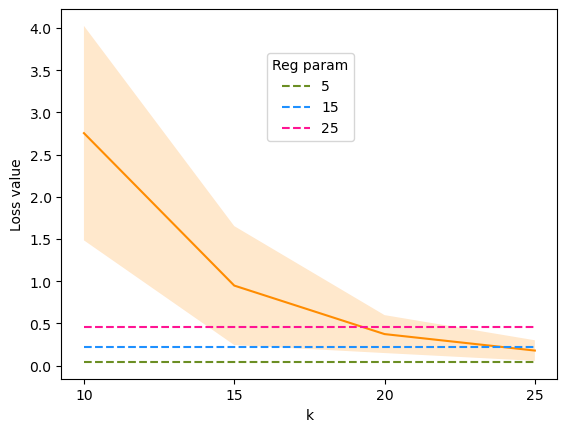

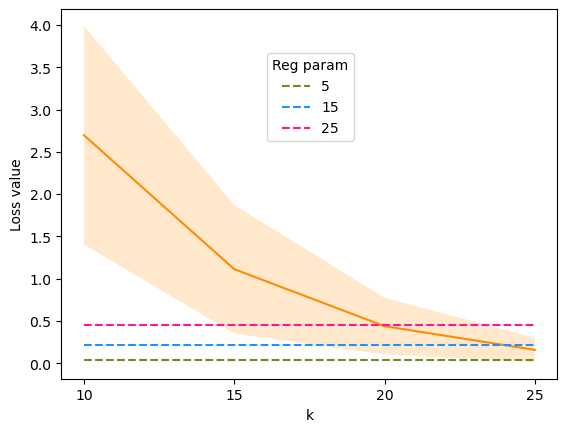

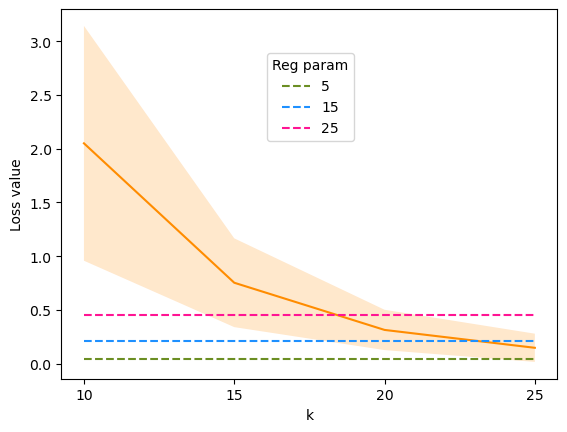

<Figure size 640x480 with 0 Axes>

In [127]:
# Plotting code

import matplotlib.lines as mlines

colors = ['darkorange', 'olivedrab', 'dodgerblue', 'deeppink', 'darkorchid']

t = np.arange(len(k_arr)-3)

for ic, cond_num in enumerate(cond_num_arr):
    
    fig, ax = plt.subplots(1)
    mu = np.mean(loss_corr[noise][ic, 0, :-3, :], axis=-1)
    sigma = np.std(loss_corr[noise][ic, 0, :-3], axis=-1)
    ax.plot(t, mu, color=colors[0])
    ax.fill_between(t, mu+sigma, mu-sigma, facecolor=colors[0], alpha=0.2)
    for ir, rp in enumerate(reg_param):
        mu = loss_corr['reg'][ic, ir]*np.ones(len(k_arr)-3)
        ax.plot(t, mu, linestyle='--', label=f"{rp}", color=colors[ir+1])
    ax.set_xticks(ticks=t, labels=k_arr[:-3])
    ax.legend(loc="upper left", title='Reg param', bbox_to_anchor=(0.4, 0.9))
    ax.set_xlabel("k")
    ax.set_ylabel("Loss value")
    # fig.legend()
    plt.savefig(f'linear_reg_{cond_num}.png', bbox_inches='tight')
    plt.show()

fig.text(0.5, 0.04, 'k', ha='center')
fig.text(0.04, 0.5, 'Loss value', va='center', rotation='vertical')
plt.savefig(f'linear_reg.png', bbox_inches='tight')
plt.show()